In [32]:
import matplotlib.pyplot as plt
import numpy as np
import pylab as pb
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn import preprocessing

In [33]:
df = pd.read_csv(r"C:\Users\h.rahnavard\Downloads\heart.csv")
df.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [34]:
df["output"].value_counts()

output
1    165
0    138
Name: count, dtype: int64

# Drawing some visual representation:

<Axes: xlabel='exng', ylabel='thalachh'>

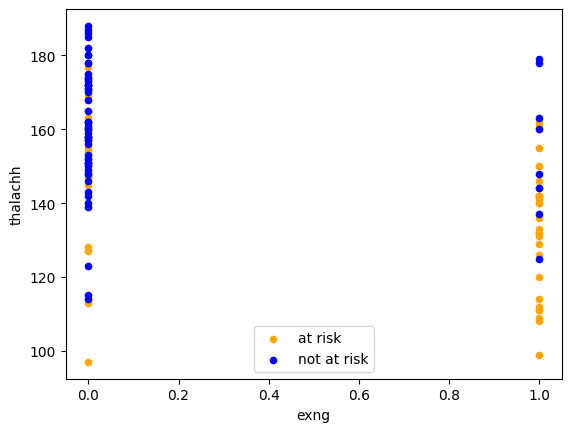

In [35]:
ax = vdf[vdf['output'] == 0][0:60].plot(kind='scatter', x='exng', y='thalachh',color='Orange', label= 'at risk')
vdf[vdf['output']==1][0:60].plot(kind='scatter', x='exng', y='thalachh',color='Blue', label='not at risk', ax=ax)

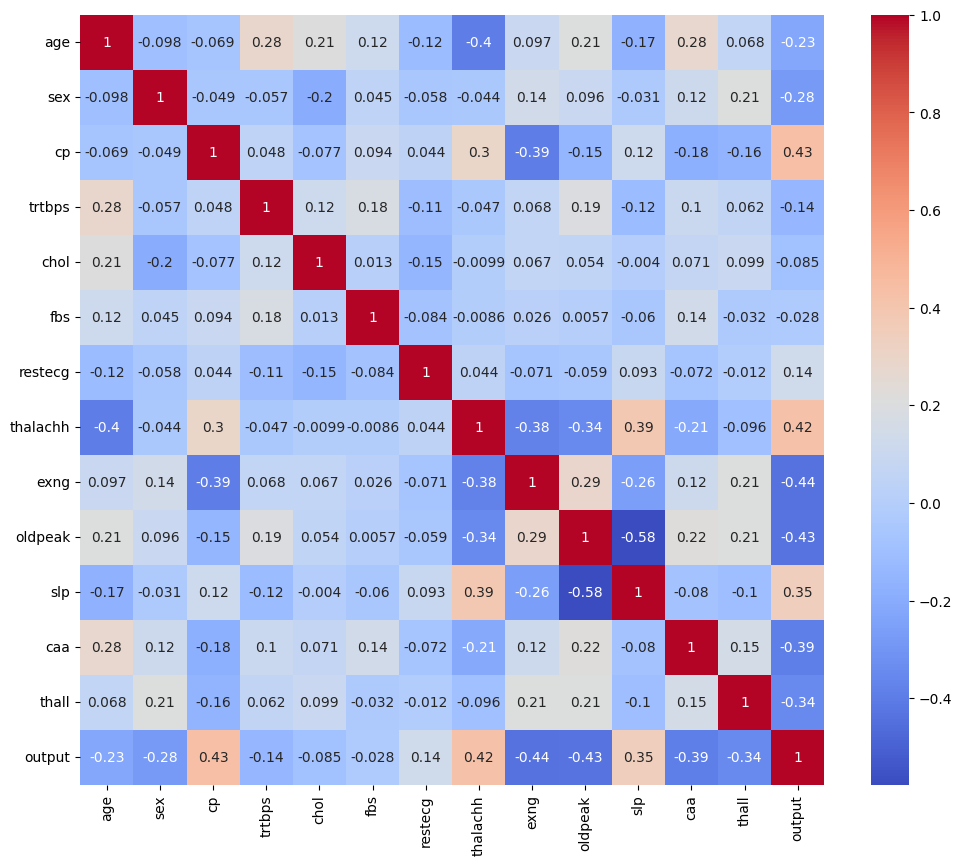

In [36]:
import seaborn as sns
plt.figure(figsize = (12, 10))
sns.heatmap(df.corr(), annot = True, cmap = 'coolwarm')
plt.show()

# based on the heatmap we realize that cp, thalachh, exng, slp, caa, thall are the most effective factors, so we drop the rest.

In [37]:
vdf = df[['cp', 'thalachh','exng','oldpeak','slp','caa', 'thall','output']]
x = vdf[['cp','thalachh','exng','oldpeak','slp','caa', 'thall']]
y = vdf['output']
vdf.describe()

,cp,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,0.966997,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,1.032052,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,3.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


# Anohther simple visual representation of the distribution of our factors:

array([[<Axes: title={'center': 'cp'}>,
        <Axes: title={'center': 'thalachh'}>,
        <Axes: title={'center': 'exng'}>],
       [<Axes: title={'center': 'oldpeak'}>,
        <Axes: title={'center': 'slp'}>, <Axes: title={'center': 'caa'}>],
       [<Axes: title={'center': 'thall'}>,
        <Axes: title={'center': 'output'}>, <Axes: >]], dtype=object)

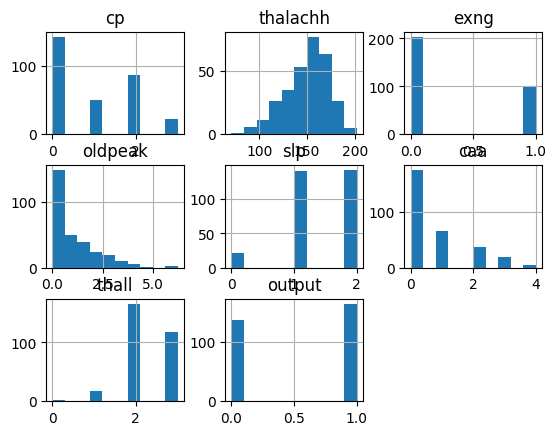

In [38]:
vdf.hist()

# Splitting our data:

In [39]:
from sklearn.model_selection import train_test_split 
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2, random_state = 5)
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(242, 7) (242,)
(61, 7) (61,)


# The first model: KNN
then we draw a comparison between predicted and real outputs for both training and testing data sets. 

In [40]:
from sklearn.neighbors import KNeighborsClassifier
k = 12 
neigh = KNeighborsClassifier(n_neighbors= k).fit(x_train, y_train)
yhat_train = neigh.predict(x_train)
for i in range(len(y_train)):
    print(f"Real outputs: {y_train.iloc[i]}, Predicted train output: {yhat_train[i]}")
yhat_test = neigh.predict(x_test)
for i in range(len(y_test)):
    print(f"Real outputs: {y_test.iloc[i]}, Predicted test output: {yhat_test[i]}")

Real outputs: 0, Predicted train output: 0
Real outputs: 0, Predicted train output: 0
Real outputs: 1, Predicted train output: 1
Real outputs: 1, Predicted train output: 1
Real outputs: 1, Predicted train output: 1
Real outputs: 0, Predicted train output: 0
Real outputs: 1, Predicted train output: 1
Real outputs: 1, Predicted train output: 1
Real outputs: 0, Predicted train output: 0
Real outputs: 0, Predicted train output: 0
Real outputs: 0, Predicted train output: 1
Real outputs: 1, Predicted train output: 1
Real outputs: 0, Predicted train output: 0
Real outputs: 0, Predicted train output: 0
Real outputs: 1, Predicted train output: 1
Real outputs: 0, Predicted train output: 0
Real outputs: 1, Predicted train output: 1
Real outputs: 1, Predicted train output: 1
Real outputs: 1, Predicted train output: 1
Real outputs: 1, Predicted train output: 1
Real outputs: 1, Predicted train output: 1
Real outputs: 1, Predicted train output: 1
Real outputs: 0, Predicted train output: 0
Real output

# Calulating accuracy metrics:

In [41]:
from sklearn import metrics 
train_accuracy = metrics.accuracy_score(y_train, yhat_train)
test_accuracy = metrics.accuracy_score(y_test, yhat_test)
print(f"train accuracy: {train_accuracy}")
print(f"test accuracy: {test_accuracy}")

train accuracy: 0.7479338842975206
test accuracy: 0.7213114754098361


In [42]:
from sklearn.metrics import f1_score, jaccard_score
jaccard = jaccard_score(y_test, yhat_test, average = 'binary')
f1 = f1_score(y_test, yhat_test, average = 'binary' )
print(f"f1 score= {f1}")
print(f"Jaccard Score = {jaccard}")

f1 score= 0.711864406779661
Jaccard Score = 0.5526315789473685


# Drawing the confusion matrix

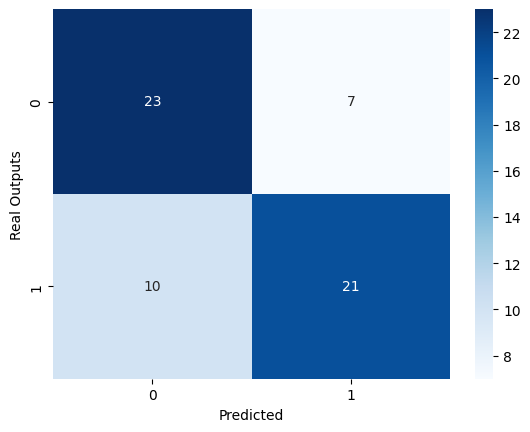

In [43]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
cm = confusion_matrix(y_test, yhat_test)
sns.heatmap(cm, annot= True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Real Outputs')
plt.show()

# Time to try other models, starting with Decision Tree
then we draw a comparison between predicted and real outputs for both training and testing data sets. 

In [44]:
from sklearn.tree import DecisionTreeClassifier
diseaseTree = DecisionTreeClassifier(criterion = 'entropy', max_depth = 4, random_state = 6)
modeltree = diseaseTree.fit(x_train, y_train)
predoutput = modeltree.predict(x_train)
for i in range(len(y_train)):
    print(f"Real train outputs: {y_train.iloc[i]}, Predcited train output: {predoutput[i]}")
predtest = modeltree.predict(x_test)
for i in range(len(y_test)):
    print(f"Real test outputs: {y_test.iloc[i]}, Predicted test outputs: {predtest[i]}")


Real train outputs: 0, Predcited train output: 0
Real train outputs: 0, Predcited train output: 0
Real train outputs: 1, Predcited train output: 1
Real train outputs: 1, Predcited train output: 1
Real train outputs: 1, Predcited train output: 1
Real train outputs: 0, Predcited train output: 0
Real train outputs: 1, Predcited train output: 1
Real train outputs: 1, Predcited train output: 1
Real train outputs: 0, Predcited train output: 0
Real train outputs: 0, Predcited train output: 0
Real train outputs: 0, Predcited train output: 0
Real train outputs: 1, Predcited train output: 1
Real train outputs: 0, Predcited train output: 0
Real train outputs: 0, Predcited train output: 0
Real train outputs: 1, Predcited train output: 1
Real train outputs: 0, Predcited train output: 0
Real train outputs: 1, Predcited train output: 1
Real train outputs: 1, Predcited train output: 1
Real train outputs: 1, Predcited train output: 1
Real train outputs: 1, Predcited train output: 1
Real train outputs: 

# Calculating accuray metrics
After using all 4 models, I realized decision tree was the most accurate model

In [45]:
train_accuracy2 = metrics.accuracy_score(y_train, predoutput)
test_accuracy2 = metrics.accuracy_score(y_test, predtest)
print(f"train accuracy: {train_accuracy2}")
print(f"test accuracy: {test_accuracy2}")

train accuracy: 0.8636363636363636
test accuracy: 0.9180327868852459


In [46]:
jaccard2 = jaccard_score(y_test, predtest, average='binary')
f1_2 = f1_score(y_test, predtest, average= 'binary')
print(f"Jaccard Score: {jaccard2}")
print(f"F1 Score: {f1_2}")

Jaccard Score: 0.8529411764705882
F1 Score: 0.9206349206349206


# Depicting a decision tree image:

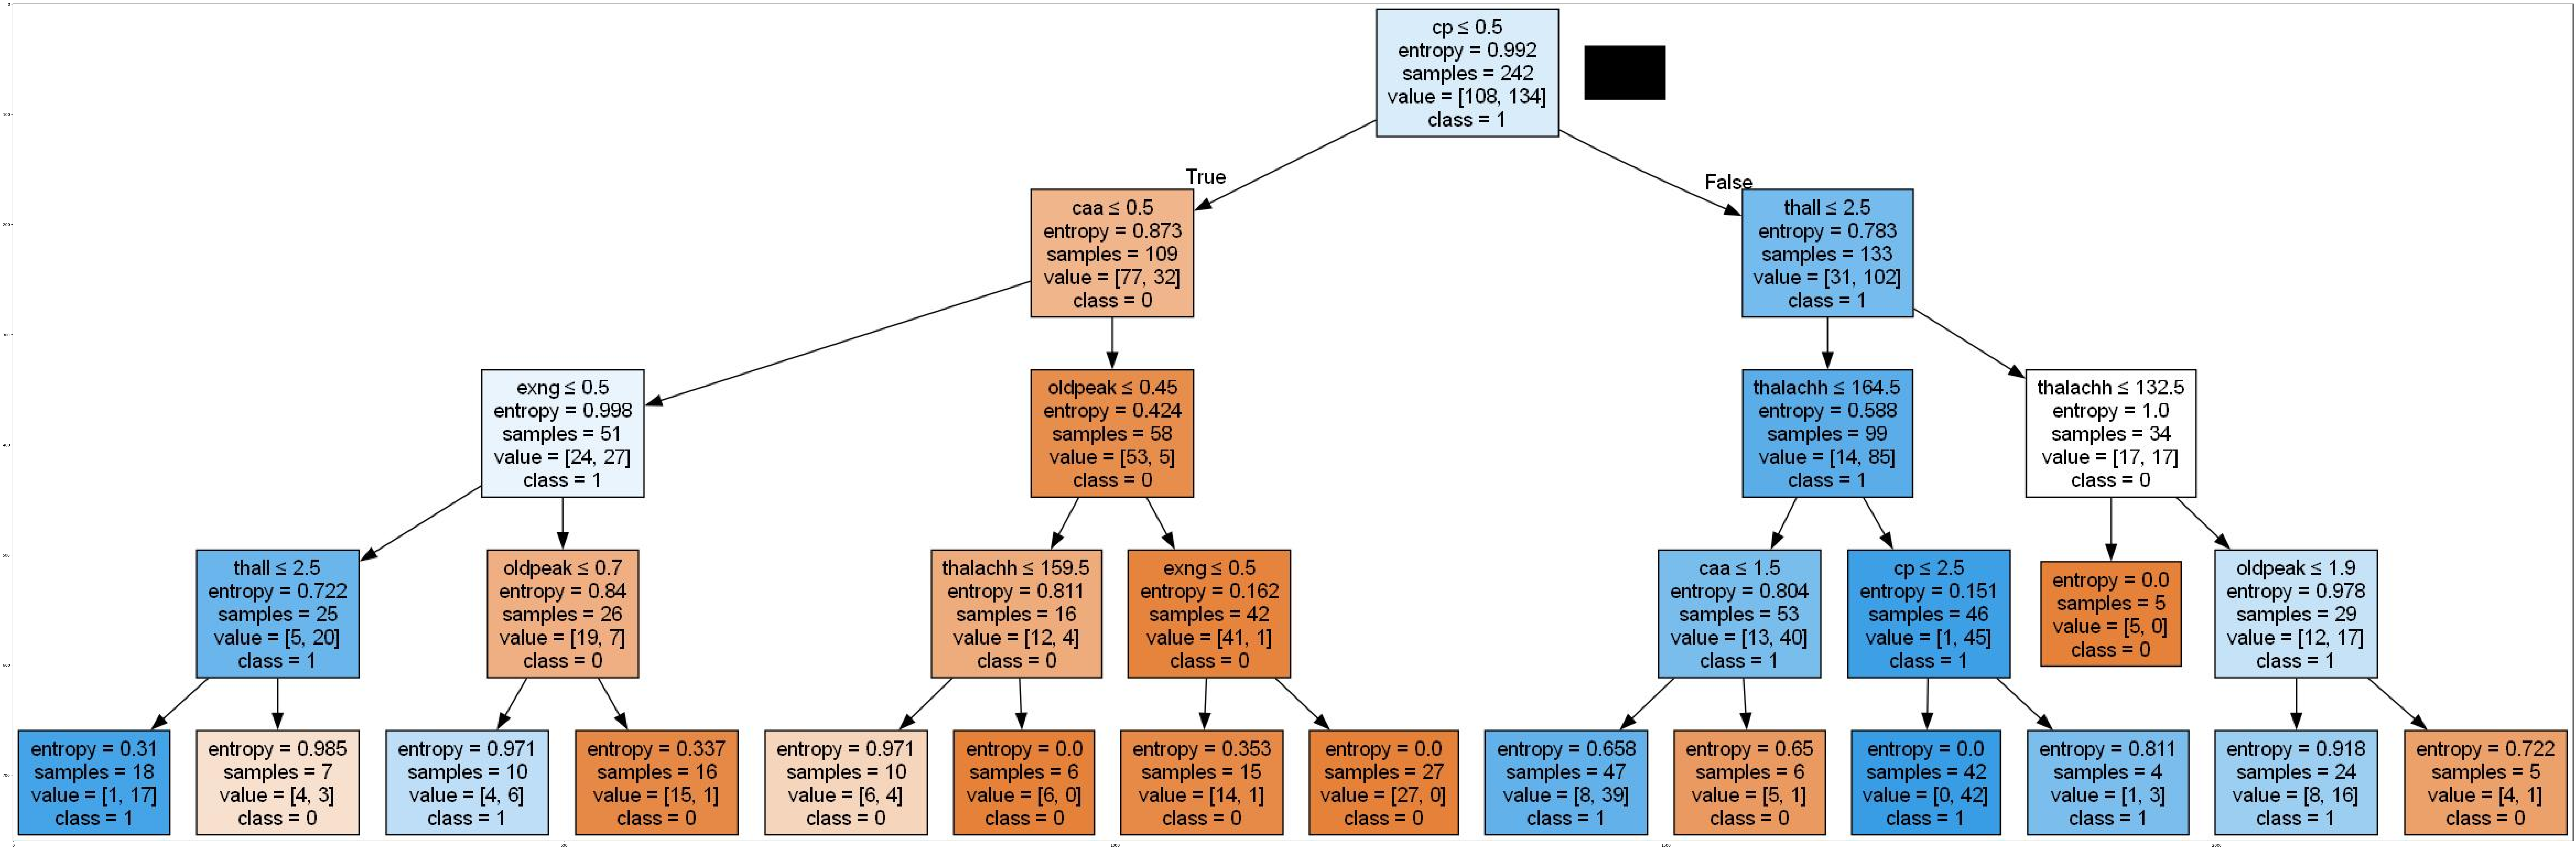

In [47]:
import os
from io import StringIO
import pydotplus
import matplotlib.image as mpimg 
from sklearn import tree
dot_data = StringIO()
file_name = "HeartDiseasePrediction.jpg"
featureNames = ['cp','thalachh','exng','oldpeak','slp','caa', 'thall']
out = tree.export_graphviz(diseaseTree, feature_names=featureNames, out_file = dot_data, class_names = np.unique(y_train).astype(str), filled = True, special_characters=True, rotate=False)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_jpg(file_name)
img = mpimg.imread(file_name)
plt.figure(figsize = (120,180))
plt.imshow(img, interpolation = 'nearest')

# 

# Now, the next model, Logistic Regression

In [48]:
from sklearn.linear_model import LogisticRegression
LogR = LogisticRegression(C=0.01,solver='liblinear')
LRmodel = LogR.fit(x_train, y_train)
LRPred = LRmodel.predict(x_train)
LRPredtest = LRmodel.predict(x_test)
for i in range(len(y_train)):
    print(f"Real train output: {y_train.iloc[i]}, Predicted train output: {LRPred[i]}")
for i in range(len(y_test)):
    print(f"Real test output: {y_test.iloc[i]}, Predicted test output: {LRPredtest[i]}")

Real train output: 0, Predicted train output: 0
Real train output: 0, Predicted train output: 0
Real train output: 1, Predicted train output: 1
Real train output: 1, Predicted train output: 1
Real train output: 1, Predicted train output: 1
Real train output: 0, Predicted train output: 0
Real train output: 1, Predicted train output: 1
Real train output: 1, Predicted train output: 1
Real train output: 0, Predicted train output: 0
Real train output: 0, Predicted train output: 0
Real train output: 0, Predicted train output: 1
Real train output: 1, Predicted train output: 1
Real train output: 0, Predicted train output: 0
Real train output: 0, Predicted train output: 0
Real train output: 1, Predicted train output: 1
Real train output: 0, Predicted train output: 0
Real train output: 1, Predicted train output: 1
Real train output: 1, Predicted train output: 1
Real train output: 1, Predicted train output: 1
Real train output: 1, Predicted train output: 1
Real train output: 1, Predicted train ou

# Calculating accuracy metrics

In [49]:
trainaccuracy3 = metrics.accuracy_score(y_train, LRPred)
testaccuracy3 = metrics.accuracy_score(y_test, LRPredtest)
print(f"train accuracy: {trainaccuracy3}")
print(f"test accuracy: {testaccuracy3}")
jaccard3 = jaccard_score(y_test, LRPredtest, average='binary')
f1_3 = f1_score(y_test, LRPredtest, average= 'binary')
print(f"Jaccard Score: {jaccard3}")
print(f"F1 Score: {f1_3}")

train accuracy: 0.7975206611570248
test accuracy: 0.9016393442622951
Jaccard Score: 0.8333333333333334
F1 Score: 0.9090909090909091


# Drawing the confusion matrix

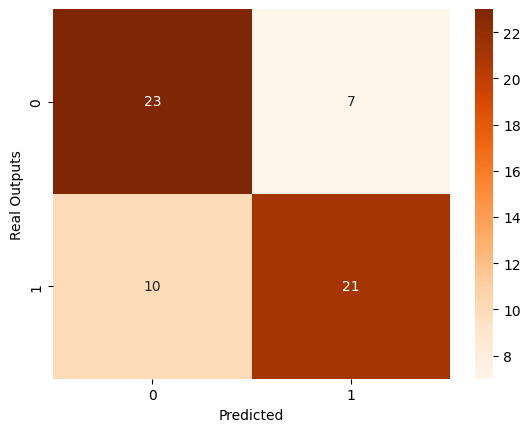

In [50]:
cm2 = confusion_matrix(y_test, LRPredtest)
sns.heatmap(cm, annot= True, fmt='d', cmap='Oranges')
plt.xlabel('Predicted')
plt.ylabel('Real Outputs')
plt.show()

# Time for our last model; SVM

In [51]:
x2 = np.asarray(vdf[['cp','thalachh','exng','oldpeak','slp','caa', 'thall']])
y2 =np.asarray(vdf['output'])
x2_train, x2_test, y2_train, y2_test = train_test_split(x2,y2,test_size=0.2, random_state = 5)
print(x2_train.shape, y2_train.shape)
print(x2_test.shape, y2_test.shape)

(242, 7) (242,)
(61, 7) (61,)


In [52]:
from sklearn import svm
supclas = svm.SVC(kernel='linear')
modelsvm = supclas.fit(x2_train, y2_train)
y2_train_pred = modelsvm.predict(x2_train)
y2_test_pred = modelsvm.predict(x2_test)
for i in range(len(y2_train)):
    print(f"Real train output: {y2_train[i]}, Predicted train output: {y2_train_pred[i]}")
for i in range(len(y_test)):
    print(f"Real test output: {y2_test[i]}, Predicted test output: {y2_test_pred[i]}")

Real train output: 0, Predicted train output: 0
Real train output: 0, Predicted train output: 0
Real train output: 1, Predicted train output: 1
Real train output: 1, Predicted train output: 0
Real train output: 1, Predicted train output: 1
Real train output: 0, Predicted train output: 0
Real train output: 1, Predicted train output: 1
Real train output: 1, Predicted train output: 1
Real train output: 0, Predicted train output: 0
Real train output: 0, Predicted train output: 0
Real train output: 0, Predicted train output: 1
Real train output: 1, Predicted train output: 1
Real train output: 0, Predicted train output: 0
Real train output: 0, Predicted train output: 0
Real train output: 1, Predicted train output: 1
Real train output: 0, Predicted train output: 0
Real train output: 1, Predicted train output: 1
Real train output: 1, Predicted train output: 1
Real train output: 1, Predicted train output: 1
Real train output: 1, Predicted train output: 1
Real train output: 1, Predicted train ou

# Calculating accuracy metrics:

In [53]:
trainaccuracy4 = metrics.accuracy_score(y2_train, y2_train_pred)
testaccuracy4 = metrics.accuracy_score(y2_test, y2_test_pred)
jaccard4 = jaccard_score(y2_test, y2_test_pred, average='binary')
f1_4 = f1_score(y2_test, y2_test_pred, average= 'binary')
print(f"train accuracy: {trainaccuracy4}")
print(f"test accuracy: {testaccuracy4}")
print(f"Jaccard Score: {jaccard4}")
print(f"F1 Score: {f1_4}")

train accuracy: 0.8181818181818182
test accuracy: 0.8688524590163934
Jaccard Score: 0.7777777777777778
F1 Score: 0.875
